In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

In [4]:
df = pd.read_csv("2.csv")
df

,n,Estimate (g),Actual (g),Half-amplitude (g)
0,2,358,352.5,5.0
1,3,155,180.0,5.0
2,4,83,95.0,2.5
3,5,51,45.0,5.0
4,6,33,25.0,5.0
5,7,22,15.0,5.0


In [5]:
n = df["n"].to_numpy()
m = df["Actual (g)"].to_numpy()/1000
dm = df["Half-amplitude (g)"].to_numpy()/1000

In [20]:
# elasticity (/N)
gamma = 0.04296842499973986
dGamma = 0.001716256634749477

# unstretched string length (m)
L0 = 97.5 / 100
dL0 = 0.5 / 100

# # unstretched mass density (kg/m)
# mu0 = 0.044308 * 100/1000
# dmu0 = 0.000341 * 100/1000

# frequency (Hz)
f = 30

g = 9.8

In [23]:
def model(n, mu0):
    return (1/g) / (
        (1/mu0) * ( (n / (2 * L0 * f))**2 ) - gamma
    )
# model(n)

In [45]:
def alpha_model(n):
    return 231.48 * np.sqrt(1.26394e-8 + 3.0686e-9 * (n**4)) / ( (n**2) - 0.651543 )

In [46]:
[fit, cov] = sp.optimize.curve_fit(model, n, m, p0=[0.00001])
[mu0] = fit
[[dmu0]] = np.sqrt(cov)
mu0, dmu0

(0.003618308365926642, 0.00013758698760589315)

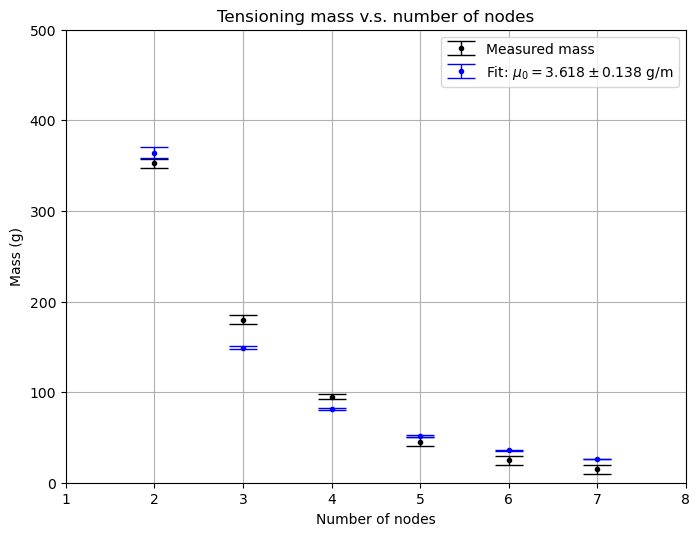

In [49]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.title("Tensioning mass v.s. number of nodes")
plt.errorbar(
    n, m*1000, yerr = dm*1000,
    label="Measured mass",
    color = "black", ecolor="black",
    linewidth = 0, elinewidth = 1, capsize=10, markersize = 3,
    marker = 'o'
)
plt.errorbar(
    n, model(n, mu0)*1000, yerr = alpha_model(n)*model(n, mu0)*1000,
    label=f"Fit: $\mu_0 = {mu0*1000:.3f} \pm {dmu0*1000:.3f}$ g/m",
    color = "blue", ecolor="blue",
    linewidth = 0, elinewidth = 1, capsize=10, markersize = 3,
    marker = 'o'
)
plt.xlabel("Number of nodes")
plt.ylabel("Mass (g)")
plt.xlim(1,8)
plt.ylim(0,500)
plt.grid()

plt.legend()
# plt.xlim(0, 1.5)
# plt.ylim(0, 1.5)
plt.savefig("2.png")
plt.show()

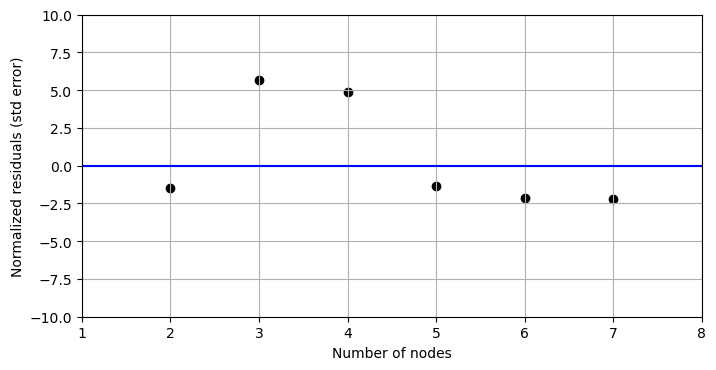

In [50]:
plt.rcParams['figure.figsize'] = [8, 4]
uncertainty = np.sqrt(dm**2 + (alpha_model(n) * model(n, mu0))**2)
plt.scatter(n, (m - model(n, mu0))/uncertainty, color="black")
# plt.legend()
plt.xlabel("Number of nodes")
plt.ylabel("Normalized residuals (std error)")
plt.xlim(1, 8)
plt.ylim(-10, 10)
plt.axhline(0, color="blue")
plt.grid()
plt.savefig("2_res.png")
plt.show()

In [53]:
dof = 1
chi2 = np.sum( ((m - model(n, mu0))/uncertainty)**2 )
chi2_reduced = chi2 / ( len(m) - dof )
chi2_reduced

13.836514013522498